In [23]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import folium
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Setup plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

/kaggle/input/sri-lanka-weather-dataset/SriLanka_Weather_Dataset.csv


In [103]:
#Extracting the medical insurance data
weather = pd.read_csv('../input/sri-lanka-weather-dataset/SriLanka_Weather_Dataset.csv')
weather.head(5)
cities = pd.DataFrame({'Cities' : weather.city.unique()})
latitudes = []
longitudes = []
# cities.head()
for i in range(cities['Cities'].size):
    lat = weather.loc[weather['city'] == cities['Cities'].iloc[i]]['latitude'].iloc[0]
    long = weather.loc[weather['city'] == cities['Cities'].iloc[i]]['longitude'].iloc[0]
    latitudes.append(lat)
    longitudes.append(long)
cities['latitude'] = latitudes; cities['longitude'] = longitudes
cities.head()

,Cities,latitude,longitude
0,Colombo,7.000000,79.899994
1,Mount Lavinia,6.900002,79.899994
2,Kesbewa,6.800003,79.899994
3,Moratuwa,6.800003,79.899994
4,Maharagama,6.800003,79.899994


# Weather Data Collected Cities

In [147]:
# Create a map
m_1 = folium.Map(width = 600, height = 400, location=[7.877083,80.697917], tiles='cartodbpositronnolabels', zoom_start=7, zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)

for idx, row in cities.iterrows():
    folium.Circle(location = [row['latitude'], row['longitude']], radius = 2000).add_to(m_1)
# Display the map
m_1

# Visualizing Data for Kandy

In [7]:
cities = weather.city.unique()
#collecting data for kandy
weather_sl_kandy = weather[weather['city'] == 'Kandy']
#changing date format
def dateTime(row):
    new_time = pd.to_datetime(row.time)
    row['time'] = new_time
    return row

weatherDate = weather_sl_kandy.apply(dateTime, axis='columns')
#dropping unwanted, redundant columns
weather_kandy = weatherDate.drop(columns = ['country', 'temperature_2m_max', 'temperature_2m_min', 'sunrise', 'sunset','apparent_temperature_max','apparent_temperature_min','snowfall_sum', 'longitude', 'latitude', 'elevation'])
#separating year, month, date from time
weather_kandy['year'] = weather_kandy['time'].dt.year
weather_kandy['month'] = weather_kandy['time'].dt.month
weather_kandy['day'] = weather_kandy['time'].dt.day
weather_kandy = weather_kandy.drop(columns = ['time'])
weather_kandy.reset_index(inplace=True, drop=True)
#bringing days column in front
col = weather_kandy.pop('day')
weather_kandy.insert(0, col.name, col)
col2 = weather_kandy.pop('month')
weather_kandy.insert(0, col2.name, col2)
col3 = weather_kandy.pop('year')
weather_kandy.insert(0, col3.name, col3)
weather_kandy = weather_kandy.drop(columns = ['city'])
weather_kandy.head()

,year,month,day,weathercode,temperature_2m_mean,apparent_temperature_mean,shortwave_radiation_sum,precipitation_sum,rain_sum,precipitation_hours,windspeed_10m_max,windgusts_10m_max,winddirection_10m_dominant,et0_fao_evapotranspiration
0,2010,1,1,2,22.0,23.8,18.09,0.0,0.0,0.0,15.3,38.9,57,3.43
1,2010,1,2,2,22.2,24.8,15.47,0.0,0.0,0.0,13.3,33.1,46,2.95
2,2010,1,3,51,22.1,25.0,14.99,0.1,0.1,1.0,10.7,28.1,40,2.84
3,2010,1,4,51,21.9,24.3,16.55,0.6,0.6,2.0,10.4,29.2,23,3.16
4,2010,1,5,1,20.8,22.6,22.68,0.0,0.0,0.0,9.7,27.0,28,4.18


Text(0.5, 1.0, 'Monthly Rainfall from 2010 - 2020 in Kandy')

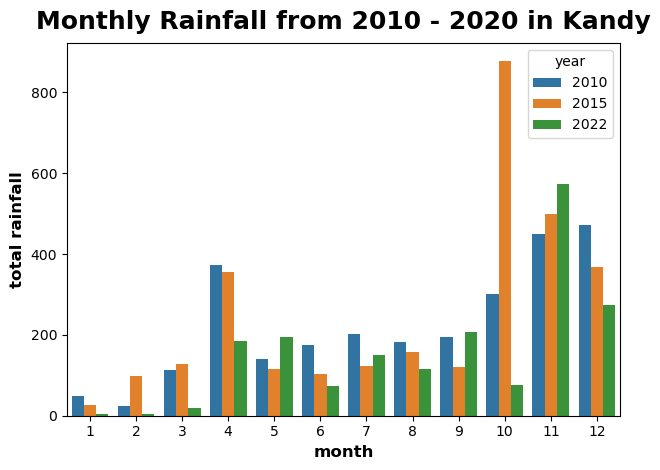

In [17]:
months = weather_kandy.month.unique()
annual_rainfall = weather_kandy.groupby(['year', 'month']).rain_sum.sum()

annual_rainfall = annual_rainfall.reset_index(name = 'total rainfall')
annual_rainfall = annual_rainfall.set_index('month')

def annualRain(year) :
    rain = annual_rainfall.loc[annual_rainfall.year == year]['total rainfall']
    return rain

monthly_rainfall_by_year = pd.DataFrame({ 'month' : months,
                                         '2010' : annualRain(2010),
                                         '2015' : annualRain(2015),
                                        '2022' : annualRain(2020)},
                                 )
monthly_rainfall_by_year = monthly_rainfall_by_year.melt('month', var_name='year', value_name='total rainfall')
sns.barplot(y = 'total rainfall', x = 'month', hue = 'year', data = monthly_rainfall_by_year)
plt.title('Monthly Rainfall from 2010 - 2020 in Sri Lanka')

**2015 flooding and extreme weather conditions due to higher than usual rainfall during October

Text(0.5, 1.0, 'Average Temperature in Kandy')

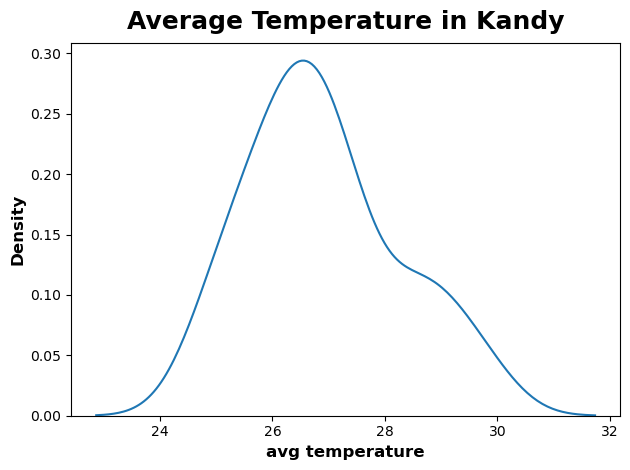

In [20]:
avg_temp = weather_kandy.groupby(['year', 'month']).apparent_temperature_mean.mean()

avg_temp = avg_temp.reset_index(name = 'avg apparent temperature')
avg_temp = avg_temp.set_index('month')
def annualTemp(year) :
    rain = avg_temp.loc[avg_temp.year == year]['avg temperature']
    return rain

monthly_temp_by_year = pd.DataFrame({ 'month' : months,
                                         '2010' : annualTemp(2010),
                                         '2015' : annualTemp(2015),
                                        '2022' : annualTemp(2020)},
                                 )
monthly_temp_by_year = monthly_temp_by_year.melt('month', var_name='year', value_name='avg temperature')
sns.kdeplot(monthly_temp_by_year['avg temperature'])
plt.title('Average Temperature in Kandy')